In [1]:
import astropy.io.fits as fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import astropy.table
from astropy.table import Table
import astropy.units as u
from astropy.coordinates import SkyCoord
from matplotlib.colors import Normalize


In [2]:
hdr1 = fits.open("EUC_MER_FINAL-CAT_concatenated.fits")
hdr2 = fits.open("EUC_MER_FINAL-MORPH_concatenated.fits")


ra_euclid=hdr1[1].data["RIGHT_ASCENSION"]
dec_euclid=hdr1[1].data["DECLINATION"]

concentration_euclid = hdr2[1].data["CONCENTRATION"]
asymmetry_euclid = hdr2[1].data["ASYMMETRY"]
smoothness_euclid = hdr2[1].data["SMOOTHNESS"]
gini_euclid = hdr2[1].data["GINI"]
moment_20_euclid = hdr2[1].data["MOMENT_20"]

hdr1.close()
hdr2.close()

print(len(ra_euclid), len(concentration_euclid))



623525 623525


In [7]:
# read CAS table from COSMOS data
maglim = 24.5

hdr3 = fits.open('CANDELS_MORFOMETRYKA/complete_candels_morphology_MFMTKv2.fits')

# A0_F814W, C1_F814W, S1_F814W, G_F814W and M20_F814W

mag_cosmos=hdr3[1].data["MAG"][hdr3[1].data["MAG"]<maglim]
ra_cosmos=hdr3[1].data["RA"][hdr3[1].data["MAG"]<maglim]
dec_cosmos=hdr3[1].data["DEC"][hdr3[1].data["MAG"]<maglim]
c_cosmos=5*hdr3[1].data["C1_F814W"][hdr3[1].data["MAG"]<maglim]
a_cosmos=hdr3[1].data["Amedian_F814W"][hdr3[1].data["MAG"]<maglim]
s_cosmos=hdr3[1].data["S1_F814W"][hdr3[1].data["MAG"]<maglim]
gini_cosmos=hdr3[1].data["G_F814W"][hdr3[1].data["MAG"]<maglim]
m20_cosmos=hdr3[1].data["M20_F814W"][hdr3[1].data["MAG"]<maglim]

#print(mag_cosmos, c_cosmos, a_cosmos, s_cosmos, gini_cosmos, m20_cosmos )
#iter=0
#for i in range(0,len(ra_cosmos)):
#    fields=data_cosmos[i].split()
#    if mag_cosmo[i]<24.5:
#        ra_cosmos[iter],dec_cosmos[iter] = fields[1],fields[2]
#        c_cosmos[iter],a_cosmos[iter],s_cosmos[iter]= fields[17],fields[18],fields[19]
#        gini_cosmos[iter],m20_cosmos[iter] = fields[20],fields[21]
#        iter=iter+1
print(len(ra_cosmos))




45978


In [8]:
# matching

anglim = 1.*u.arcsecond

c = SkyCoord(ra=ra_euclid*u.degree, dec=dec_euclid*u.degree)

catalog = SkyCoord(ra=ra_cosmos*u.degree, dec=dec_cosmos*u.degree)

idx, d2d, d3d = c.match_to_catalog_sky(catalog)




In [5]:
print(c_cosmos[idx[d2d<1*u.arcsecond]], 
      a_cosmos[idx[d2d<1*u.arcsecond]], 
      s_cosmos[idx[d2d<1*u.arcsecond]], 
      gini_cosmos[idx[d2d<1*u.arcsecond]],
      m20_cosmos[idx[d2d<1*u.arcsecond]])

[5.00000000e+20 2.50774060e+00 3.05528440e+00 ... 2.01420950e+00
 3.22310615e+00 2.76663935e+00] [1.0000000e+20 1.8593971e-01 1.2826837e-01 ... 2.9393538e-01 2.4983882e-01
 1.2600257e-01] [5.0000000e+20 2.7116700e-02 1.2990975e-01 ... 3.5305650e-02 5.9579350e-02
 2.8804450e-02] [1.0000000e+20 5.7880239e-01 6.8664240e-01 ... 5.4036001e-01 5.6947126e-01
 6.4481539e-01] [ 1.0000000e+20 -4.3952075e-01 -5.3611720e-01 ...  1.4522342e-01
  2.1678077e-01 -5.6173327e-01]


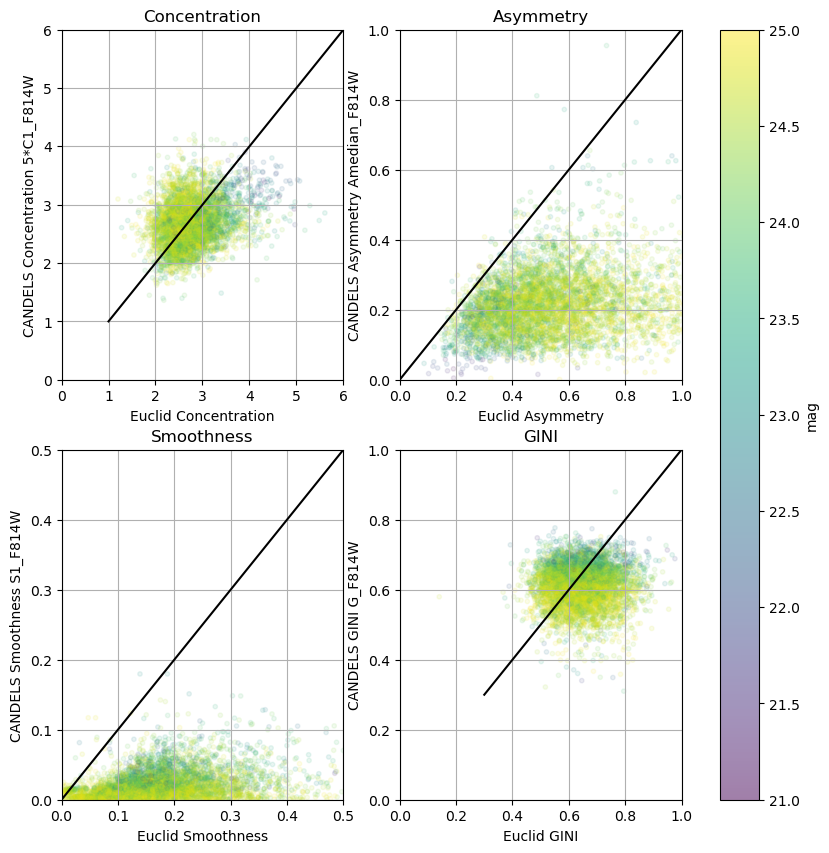

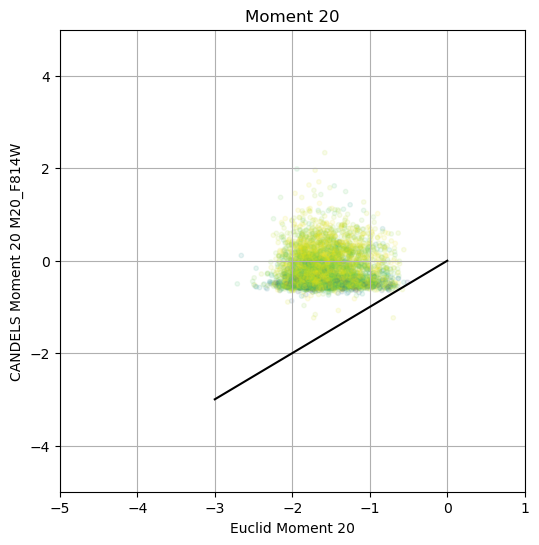

In [9]:
# plotting 

size = 10

cmap1 = plt.colormaps["viridis"]
plt.cm.ScalarMappable(norm=Normalize(21, 25), cmap=cmap1)

fig, axs = plt.subplots(2,2, figsize=[10,10])
axs[0,0].scatter(concentration_euclid[d2d<anglim], 
                 c_cosmos[idx[d2d<anglim]],
                 c=mag_cosmos[idx[d2d<anglim]],
                 cmap=cmap1, s=size,alpha=0.1)
axs[0,0].plot([1,2,3,4,5,6],[1,2,3,4,5,6],'k-')
axs[0,0].grid(True)

axs[0,0].set(xlim=(0, 6), ylim=(0, 6))
axs[0,0].set_title("Concentration")
axs[0,0].set_xlabel("Euclid Concentration")
axs[0,0].set_ylabel("CANDELS Concentration 5*C1_F814W")

axs[0,1].scatter(asymmetry_euclid[d2d<anglim], 
                 a_cosmos[idx[d2d<anglim]],
                 c=mag_cosmos[idx[d2d<anglim]], 
                 cmap=cmap1,s=size,alpha=0.1)
axs[0,1].plot([0,1],[0,1],'k-')
axs[0,1].set_title("Asymmetry")
axs[0,1].set(xlim=(0, 1), ylim=(0, 1))
axs[0,1].set_xlabel("Euclid Asymmetry")
axs[0,1].set_ylabel("CANDELS Asymmetry Amedian_F814W")
axs[0,1].grid(True)

axs[1,0].scatter(smoothness_euclid[d2d<anglim], 
                 s_cosmos[idx[d2d<anglim]],
                 c=mag_cosmos[idx[d2d<anglim]], 
                 cmap=cmap1,s=size,alpha=0.1)
axs[1,0].plot([0,0.8],[0,0.8],'k-')
axs[1,0].set_title("Smoothness")
axs[1,0].set(xlim=(0, 0.5), ylim=(0, 0.5))

axs[1,0].set_xlabel("Euclid Smoothness")
axs[1,0].set_ylabel("CANDELS Smoothness S1_F814W")
axs[1,0].grid(True)

axs[1,1].scatter(gini_euclid[d2d<anglim], 
                 gini_cosmos[idx[d2d<anglim]],
                 c=mag_cosmos[idx[d2d<anglim]], 
                 cmap=cmap1,s=size,alpha=0.1)
axs[1,1].plot([0.3,1],[0.3,1],'k-')
axs[1,1].set(xlim=(0, 1), ylim=(0, 1))

axs[1,1].set_title("GINI")
axs[1,1].set_xlabel("Euclid GINI")
axs[1,1].set_ylabel("CANDELS GINI G_F814W")
axs[1,1].grid(True)
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(21, 25)), cmap=cmap1,
             ax=axs, label="mag", alpha=0.5)

plt.savefig("CAS_GINI_cosmos-vs-euclid_"+str(maglim)+".png",dpi=150)
plt.show()

fig, axs = plt.subplots(1,1, figsize=[6,6])
axs.scatter(moment_20_euclid[d2d<anglim], 
            m20_cosmos[idx[d2d<anglim]],
            c=mag_cosmos[idx[d2d<anglim]], 
            cmap=cmap1,s=size,alpha=0.1)
axs.plot([-3,0],[-3,0],'k-')
axs.set_title("Moment 20")
axs.set(xlim=(-5, 1),ylim=(-5, 5))
axs.set_xlabel("Euclid Moment 20")
axs.set_ylabel("CANDELS Moment 20 M20_F814W")
axs.grid(True)
plt.savefig("M20_cosmos-vs-euclid_24.5.png",dpi=150)
plt.show()



In [35]:
print(len(a_cosmos[idx[d2d<anglim]]))



5707
